### 【問題1】ラグランジュの未定乗数法による最急降下 
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 $\lambda$ を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値

        Attributes
        ----------
        self.lamda_ :  次の形のndarray, shape(n_samples, 1)
          未定乗数
        self.lamda_new :  次の形のndarray, shape(n_samples, 1)
          更新後の未定乗数
        self.k :  次の形のndarray, shape(n_samples, n_samples)
          指定のKernel関数で計算後の配列
        self.val : int64
          検証用データの有無を識別。　0：無  1：有
        """
        self.X_ = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
        self.y_ = y.reshape(len(y),1)
        np.random.seed(seed=1)
        self.lamda_ = np.random.rand(self.X_.shape[0], 1)
        self.lamda_new = self.lamda_.copy()
        self.val = 0
        if self.kernel == "linear":
            self.k = line_karnel(self.X_)

        for iter_n in range(self.iter):
            self._gradient_descent()
            
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def _gradient_descent(self):
        """
        再急降下法により、次回イテレーションのΘを算出する。(学習データ専用)
        Parameters
        ----------
        delta_L : 次の形のndarray, shape (n_samples, 1)
            ラグランジュ関数の∑部の計算結果
        Attributes
        ----------
        self.support_vec_n : int
          サポートベクターの数
        self.support_vec_index : 次の形のndarray, shape (self.support_vec_n, )
          サポートベクターのインデックス
        """
        delta_L = self.y_ * np.dot(self.k.T, self.lamda_*self.y_)
        self.lamda_new += self.lr*(1-delta_L)
        self.lamda_new = np.where(self.lamda_new < 0, 0, self.lamda_new)

        self.support_vec_index = np.where(self.lamda_new > self.threshold)[0]
        self.support_vec = self.X_[self.support_vec_index]
        self.support_vec_n = len(self.support_vec)
        
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X_p : 次の形のndarray, shape (n_samples, n_features+1)
            サンプル(線形で計算しやすいように、0次の特徴量=1を挿入している)

        Attributes
        ----------
        self.k_p :  次の形のndarray, shape(n_samples, self.support_vec_n)
          サンプルと学習後サポートベクタを用いて
          リニアのKernel関数で計算した結果の配列
        
        Returns
        -------
        f： 次の形のndarray, shape (n_samples, )
            SVM分類器による推定結果
        """
        X_p = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
        self.k_p = np.dot(X_p, self.support_vec.T)
        f = np.dot(self.k_p, self.lamda_new[self.support_vec_index]*self.y_[self.support_vec_index])
        f = f.reshape(len(f))
        f = np.where(f > 0, 1, -1)
        return f

In [3]:
def line_karnel(X):
    k = np.dot(X, X.T)
    return k

In [4]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
std = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=0)
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

display(X_train_std.shape)
display(X_test_std.shape)
display(y_train.shape)
display(y_test.shape)

(375, 2)

(125, 2)

(375,)

(125,)

In [6]:
scr_svm = ScratchSVMClassifier(1, 0.001)
#X_train = np.arange(10).reshape(5,2)
#y_train = np.array([[-1], [-1], [1], [1], [1]])

std = StandardScaler()
X_train_std = std.fit_transform(X_train)

scr_svm.fit(X_train_std, y_train)
#display(scr_svm.support_vec_index.shape)
display(scr_svm.lamda_new)

array([[2.32817680e-01],
       [5.19020011e-01],
       [0.00000000e+00],
       [4.78646983e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.02327210e-01],
       [2.29550735e-01],
       [2.63941472e-01],
       [9.97723370e-02],
       [4.30138739e-01],
       [0.00000000e+00],
       [6.34669335e-01],
       [0.00000000e+00],
       [3.67219855e-01],
       [1.56282356e-01],
       [3.69520477e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [5.32579409e-01],
       [7.77575273e-01],
       [4.84904908e-02],
       [3.72726661e-01],
       [6.04569845e-01],
       [6.51367382e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [5.64877135e-01],
       [0.00000000e+00],
       [1.57311190e-01],
       [6.64416871e-01],
       [3.56206718e-01],
       [4.76502634e-01],
       [3.28485602e-02],
       [3.56382672e-01],
       [6.44221785e-01],
       [0.00000000e+00],
       [5.33786069e-01],


### 【問題2】サポートベクターの決定 
計算したラグランジュ乗数 $\lambda$ が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。
閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

In [7]:
display(scr_svm.support_vec_n)
display(scr_svm.support_vec)
#display(scr_svm.support_vec_index)

276

array([[ 1.        ,  0.33342894, -0.71823319],
       [ 1.        ,  0.84367567, -0.30901115],
       [ 1.        ,  0.02764979, -1.46721472],
       [ 1.        ,  0.16412499, -1.25885202],
       [ 1.        ,  0.17935757, -0.7678184 ],
       [ 1.        , -1.37124873,  0.44204081],
       [ 1.        , -0.52199606,  1.57994808],
       [ 1.        ,  0.50322351, -0.98991344],
       [ 1.        ,  0.5455194 , -0.87433946],
       [ 1.        , -0.622435  ,  1.37713342],
       [ 1.        , -0.04694597,  1.69515804],
       [ 1.        , -0.2481112 ,  1.0420685 ],
       [ 1.        , -2.11308785, -0.35045869],
       [ 1.        , -0.00817222, -1.10438624],
       [ 1.        , -1.37298465,  0.37808199],
       [ 1.        , -1.8531345 ,  0.23432801],
       [ 1.        , -1.36556465,  0.42867083],
       [ 1.        , -0.49636573,  1.12921592],
       [ 1.        ,  1.04107546, -0.80982109],
       [ 1.        ,  1.1740117 , -0.3658121 ],
       [ 1.        , -1.08043519,  0.852

### 【問題3】推定 
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた $f(x)$ の符号が分類結果です。

In [8]:
#X_test = np.arange(10).reshape(5,2)
#X_test_std = std.fit_transform(X_test)
print("Scratch{}".format(scr_svm.predict(X_test_std)))
scr_svm.k_p.shape

Scratch[-1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1
 -1  1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1
  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1
  1  1 -1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1
  1 -1 -1 -1 -1]


(125, 276)

In [9]:
from sklearn.svm import SVC
SKL_svm=SVC(gamma="auto")

SKL_svm.fit(X_train_std, y_train)
print("Scratch{}".format(scr_svm.predict(X_test_std)))
print("skLearn{}".format(SKL_svm.predict(X_test_std)))

Scratch[-1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1
 -1  1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1
  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1
  1  1 -1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1
  1 -1 -1 -1 -1]
skLearn[-1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1
 -1  1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1
  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1
  1  1 -1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1
  1 -1 -1 -1 -1]


### 【問題4】学習と推定 
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。
scikit-learnによる実装と比べ、正しく動いているかを確認してください。
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [10]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['-1', '+1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスタンスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def func_models_eval(_X_train, _y_train, _X_test, _y_test):

    models = {
         "Scratch_SVM": ScratchSVMClassifier(5, 0.001),
             
         "SKL_SVC":SVC(gamma="auto")
    }
    
    _df_results = pd.DataFrame()
    for model_name, model in models.items():
        model.fit(_X_train, _y_train)
        display(model.predict(_X_test))
        _df_result = pd.DataFrame({model_name:[accuracy_score(_y_test, model.predict(_X_test)), 
                                           precision_score(_y_test, model.predict(_X_test), average='micro'),
                                           recall_score(_y_test, model.predict(_X_test), average='micro'),
                                           f1_score(_y_test, model.predict(_X_test), average='micro')]}, 
                                index=["accuracy_score", "precision_score", "recall_score","f1_score"])
        _df_results = pd.concat([_df_results, _df_result],axis=1)                        
                                
        print("{}".format(model_name))
        print(" {}".format(confusion_matrix(_y_test, model.predict(_X_test)), average='macro'))        
        print("TRAIN_DATA")
        decision_region(_X_train, _y_train, model, 0.01, model_name)
        print("TEST_DATA")
        decision_region(_X_test, _y_test, model, 0.01, model_name)
    return _df_results

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=0)
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

display(X_train_std.shape)
display(X_test_std.shape)
display(y_train.shape)
display(y_test.shape)

(375, 2)

(125, 2)

(375,)

(125,)

array([-1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1])

Scratch_SVM
 [[51  0]
 [ 0 74]]
TRAIN_DATA


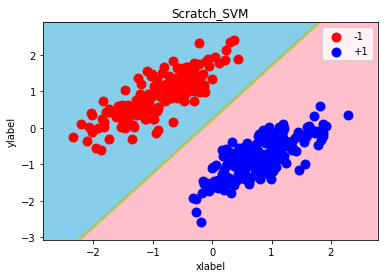

TEST_DATA


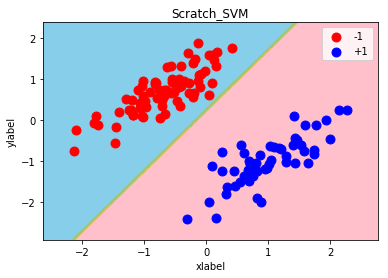

array([-1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1])

SKL_SVC
 [[51  0]
 [ 0 74]]
TRAIN_DATA


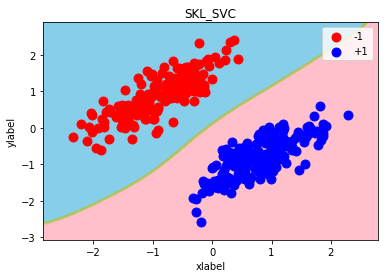

TEST_DATA


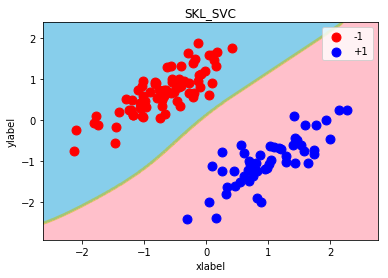

,Scratch_SVM,SKL_SVC
accuracy_score,1.0,1.0
precision_score,1.0,1.0
recall_score,1.0,1.0
f1_score,1.0,1.0


In [14]:
df_results = func_models_eval(X_train_std, y_train, X_test_std, y_test)
df_results

### 【問題5】決定領域の可視化 
決定領域を可視化してください。
以下の例のようにサポートベクターは異なる色で示してください。

In [33]:
def func_models_eval2(_X_train, _y_train, _X_test, _y_test):

    models = {
         "Scratch_SVM": ScratchSVMClassifier(5, 0.001, threshold=1e-5)
    }
    
    _df_results = pd.DataFrame()
    for model_name, model in models.items():
        model.fit(_X_train, _y_train)
        display(model.predict(_X_test))
        _df_result = pd.DataFrame({model_name:[accuracy_score(_y_test, model.predict(_X_test)), 
                                           precision_score(_y_test, model.predict(_X_test), average='micro'),
                                           recall_score(_y_test, model.predict(_X_test), average='micro'),
                                           f1_score(_y_test, model.predict(_X_test), average='micro')]}, 
                                index=["accuracy_score", "precision_score", "recall_score","f1_score"])
        _df_results = pd.concat([_df_results, _df_result],axis=1)                        
                                
        print("{}".format(model_name))
        print(" {}".format(confusion_matrix(_y_test, model.predict(_X_test)), average='macro'))        
        print("TRAIN_DATA")
        decision_region2(_X_train, _y_train, model, 0.01, model_name)
        print("TEST_DATA")
        decision_region2(_X_test, _y_test, model, 0.01, model_name)
    return _df_results

In [34]:
def decision_region2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['-1', '+1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスタンスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.scatter(model.support_vec[:, 1], model.support_vec[:, 2], s=80, color="y", label="support_vec", marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    display(model.support_vec_n)
    display(model.support_vec)
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

array([-1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1])

Scratch_SVM
 [[51  0]
 [ 0 74]]
TRAIN_DATA


6

array([[ 1.        , -0.00817222, -1.10438624],
       [ 1.        ,  0.23270469, -0.57182363],
       [ 1.        ,  0.19692878, -0.76408913],
       [ 1.        ,  0.06021299, -1.02362733],
       [ 1.        , -0.92081691, -0.06873605],
       [ 1.        ,  0.44837058, -0.55308565]])

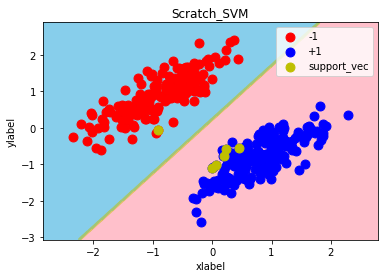

TEST_DATA


6

array([[ 1.        , -0.00817222, -1.10438624],
       [ 1.        ,  0.23270469, -0.57182363],
       [ 1.        ,  0.19692878, -0.76408913],
       [ 1.        ,  0.06021299, -1.02362733],
       [ 1.        , -0.92081691, -0.06873605],
       [ 1.        ,  0.44837058, -0.55308565]])

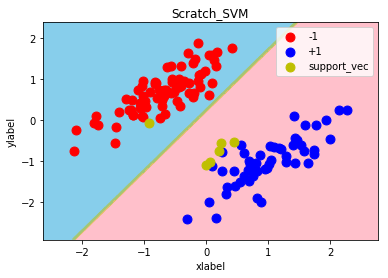

,Scratch_SVM
accuracy_score,1.0
precision_score,1.0
recall_score,1.0
f1_score,1.0


In [35]:
df_results = func_models_eval2(X_train_std, y_train, X_test_std, y_test)
df_results